Found 74 images belonging to 9 classes.
Found 18 images belonging to 9 classes.
Epoch 1/50
2/2 [==============================] - 23s 9s/step - loss: 9.9605 - acc: 0.0714
Epoch 2/50
2/2 [==============================] - 12s 5s/step - loss: 4.5757 - acc: 0.1190
Epoch 3/50
2/2 [==============================] - 14s 4s/step - loss: 2.4269 - acc: 0.0938
Epoch 4/50
2/2 [==============================] - 12s 2s/step - loss: 2.2084 - acc: 0.1190
Epoch 5/50
2/2 [==============================] - 12s 5s/step - loss: 2.2218 - acc: 0.0476
Epoch 6/50
2/2 [==============================] - 12s 2s/step - loss: 2.2049 - acc: 0.1190
Epoch 7/50
2/2 [==============================] - 12s 5s/step - loss: 2.2021 - acc: 0.0714
Epoch 8/50
2/2 [==============================] - 9s 4s/step - loss: 2.2052 - acc: 0.0938
Epoch 9/50
2/2 [==============================] - 7s 5s/step - loss: 2.2327 - acc: 0.1190
Epoch 10/50
2/2 [==============================] - 9s 4s/step - loss: 2.2497 - acc: 0.0312
Epoch 11/50


C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

         CBC       0.00      0.00      0.00         2
          CD       0.00      0.00      0.00         2
          CI       0.00      0.00      0.00         2
          CM       0.00      0.00      0.00         2
       CNFCS       0.00      0.00      0.00         2
          GB       0.20      0.50      0.29         2
          MC       0.00      0.00      0.00         2
          PE       0.17      1.00      0.29         2
          TG       0.00      0.00      0.00         2

    accuracy                           0.17        18
   macro avg       0.04      0.17      0.06        18
weighted avg       0.04      0.17      0.06        18



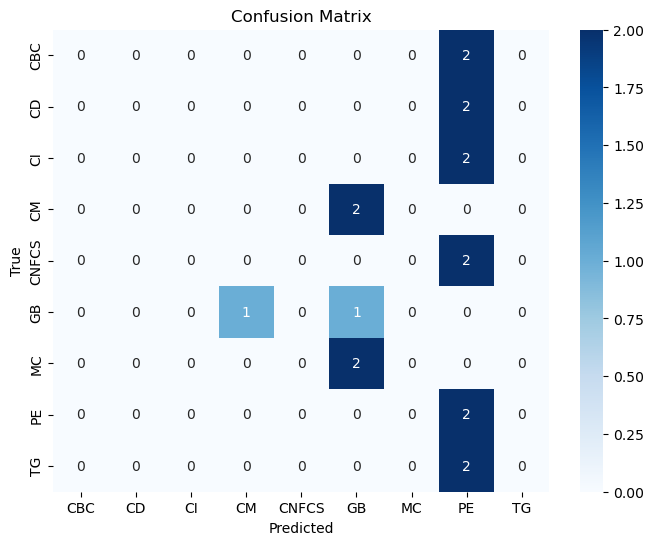

KeyError: 'val_acc'

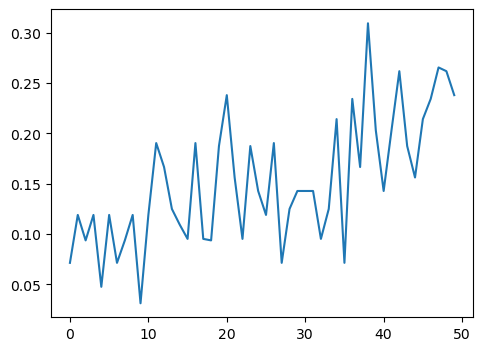

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = r"C:\Users\mttvi\OneDrive\Área de Trabalho\DB2\Igm_filtradas"
image_size = (256, 192)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 192, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

accuracy_percentage = np.sum(y_true == y_pred) / len(y_true) * 100
print(f"Acurácia em porcentagem: {accuracy_percentage:.2f}%")

cm = confusion_matrix(y_true, y_pred)

class_labels = list(train_generator.class_indices.keys())
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
